In [1]:
import bs4 as bs
import requests
import datetime
import yfinance as yf
import pandas as pd

In [2]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [3]:
tickers = []

for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)
    
tickers = [s.replace('\n', '') for s in tickers]

In [4]:
# print(tickers)

In [5]:
tickers_data= pd.DataFrame()
key_metrics = ['shortName', 'industry','sector','priceToBook','beta']

In [6]:
for ticker in tickers:
    ticker_object = yf.Ticker(ticker)

    if(any(k not in ticker_object.info for k in key_metrics)):
        continue            
    temp = pd.DataFrame([dict((k,ticker_object.info[k]) for k in key_metrics)],index=[ticker])
    tickers_data = pd.concat([tickers_data,temp])

In [7]:
tickers_data

,shortName,industry,sector,priceToBook,beta
MMM,3M Company,Conglomerates,Industrials,3.700505,0.952112
AOS,A.O. Smith Corporation,Specialty Industrial Machinery,Industrials,5.910924,1.264788
ABT,Abbott Laboratories,Medical Devices,Healthcare,5.036841,0.663028
ABBV,AbbVie Inc.,Drug Manufacturers—General,Healthcare,18.415947,0.554225
ACN,Accenture plc,Information Technology Services,Technology,8.501447,1.238380
...,...,...,...,...,...
XYL,Xylem Inc.,Specialty Industrial Machinery,Industrials,5.758126,1.081338
ZBRA,Zebra Technologies Corporation,Communication Equipment,Technology,4.923868,1.662323
ZBH,"Zimmer Biomet Holdings, Inc.",Medical Devices,Healthcare,2.476449,1.010915
ZION,Zions Bancorporation N.A.,Banks—Regional,Financial Services,0.869443,1.101760


In [10]:
maxPB = tickers_data.loc[tickers_data.groupby('industry').priceToBook.idxmax()].sort_values(by='priceToBook')

In [8]:
minPB = tickers_data.loc[tickers_data.groupby('industry').priceToBook.idxmin()].sort_values(by='priceToBook')

In [11]:
pd.set_option('display.max_rows', None)
maxPB

,shortName,industry,sector,priceToBook,beta
TAP,Molson Coors Beverage Company,Beverages—Brewers,Consumer Defensive,1.135283,0.864788
PNC,"PNC Financial Services Group, I",Banks—Regional,Financial Services,1.213162,1.105985
WBA,"Walgreens Boots Alliance, Inc.",Pharmaceutical Retailers,Healthcare,1.326846,0.719014
VICI,VICI Properties Inc.,REIT—Diversified,Real Estate,1.378909,0.962676
BXP,"Boston Properties, Inc.",REIT—Office,Real Estate,1.408764,1.094366
JPM,JP Morgan Chase & Co.,Banks—Diversified,Financial Services,1.510876,1.086267
RE,"Everest Re Group, Ltd.",Insurance—Reinsurance,Financial Services,1.526254,0.610211
AIZ,"Assurant, Inc.",Insurance—Specialty,Financial Services,1.584806,0.541549
ADM,Archer-Daniels-Midland Company,Farm Products,Consumer Defensive,1.638277,0.807746
HST,Host Hotels,REIT—Hotel & Motel,Real Estate,1.735456,1.310915


<AxesSubplot:>

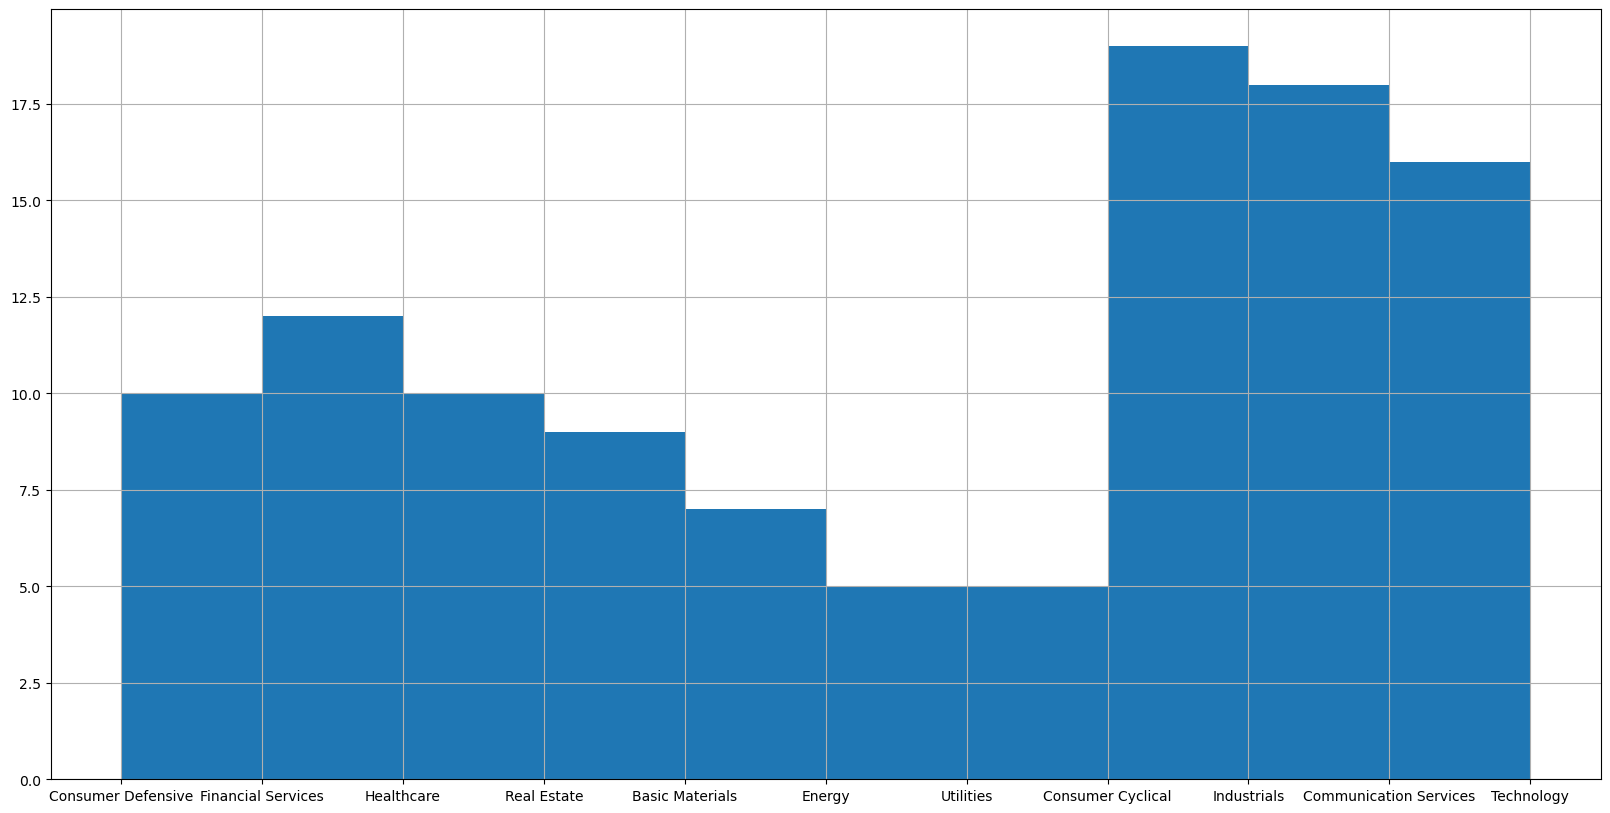

In [23]:
maxPB['sector'].hist(figsize=(20,10))

In [9]:
pd.set_option('display.max_rows', None)
minPB

,shortName,industry,sector,priceToBook,beta
PARA,Paramount Global,Entertainment,Communication Services,0.471920,1.675000
C,"Citigroup, Inc.",Banks—Diversified,Financial Services,0.493235,1.568661
VTRS,Viatris Inc.,Drug Manufacturers—Specialty & Generic,Healthcare,0.586938,1.175704
CFG,"Citizens Financial Group, Inc.",Banks—Regional,Financial Services,0.593875,1.304929
IVZ,Invesco Ltd,Asset Management,Financial Services,0.668715,1.349295
LNC,Lincoln National Corporation,Insurance—Life,Financial Services,0.715213,1.750000
GM,General Motors Company,Auto Manufacturers,Consumer Cyclical,0.747215,1.339788
WRK,Westrock Company,Packaging & Containers,Consumer Cyclical,0.764308,1.201056
MHK,"Mohawk Industries, Inc.","Furnishings, Fixtures & Appliances",Consumer Cyclical,0.791402,1.281338
COF,Capital One Financial Corporati,Credit Services,Financial Services,0.840562,1.467957


<AxesSubplot:>

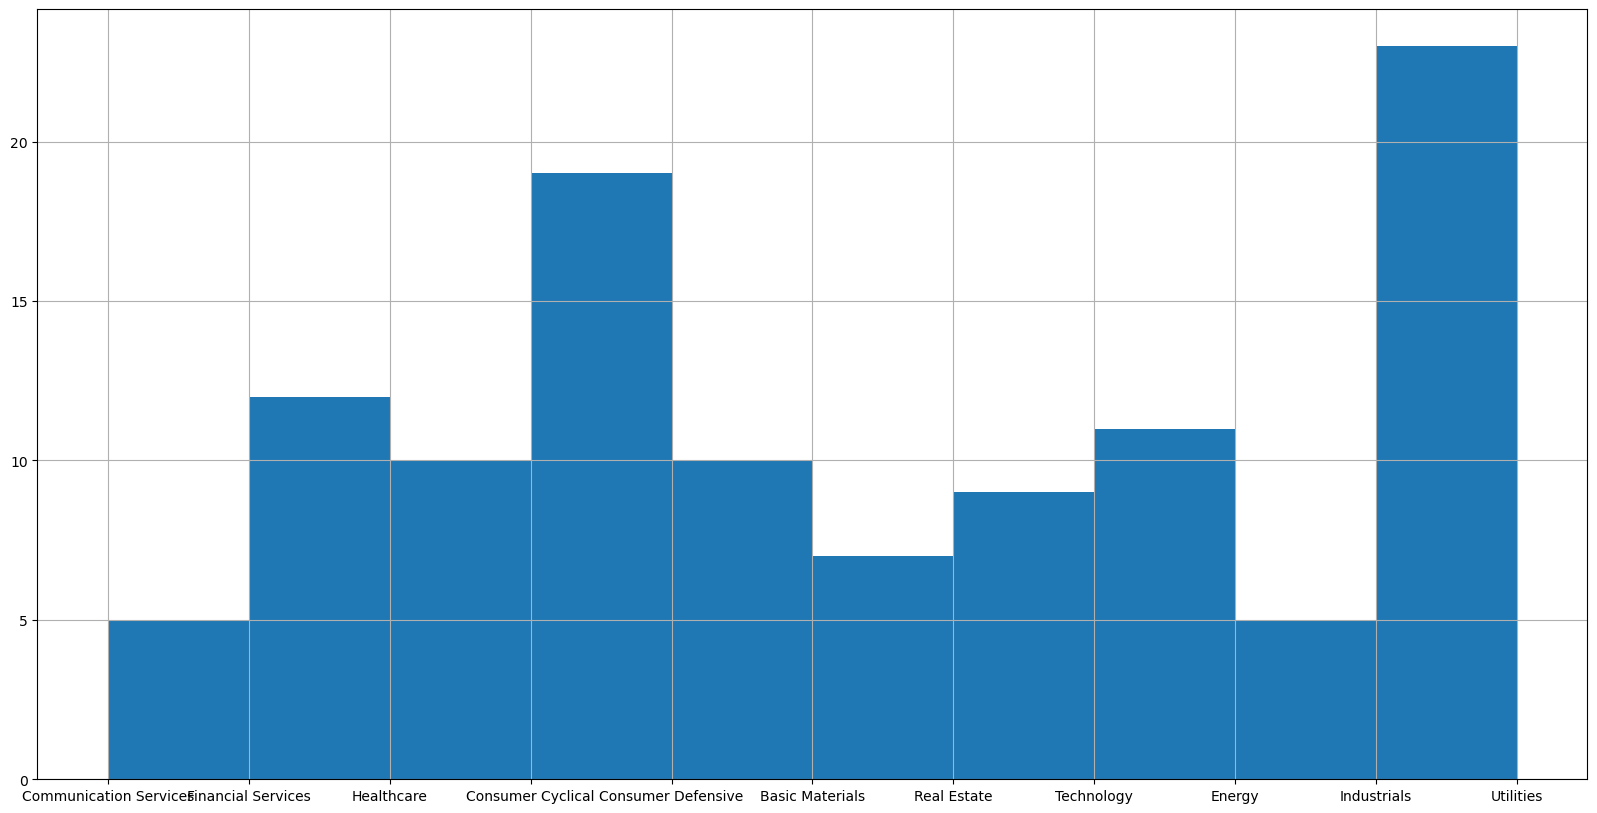

In [24]:
minPB['sector'].hist(figsize=(20,10))

In [ ]:
# # Download price data
# start = datetime.datetime(2020, 1, 1)
# end = datetime.datetime(2022, 1, 1)
# data = yf.download(tickers, start=start, end=end)
# df = data.stack().reset_index().rename(index=str, columns={"level_1": "Symbol"}).sort_values(['Symbol','Date'])
# df.set_index('Date', inplace=True
# df.head()

[*********************100%***********************]  503 of 503 completed

ERROR 
4 Failed downloads:
ERROR ['BRK.B']: Exception('BRK.B: No timezone found, symbol may be delisted')
ERROR ['CEG']: Exception("CEG: Data doesn't exist for startDate = 1577854800, endDate = 1641013200")
ERROR ['BF.B']: Exception('BF.B: No price data found, symbol may be delisted (1d 2020-01-01 00:00:00 -> 2022-01-01 00:00:00)')
ERROR ['GEHC']: Exception("GEHC: Data doesn't exist for startDate = 1577854800, endDate = 1641013200")


In [6]:
msft = yf.Ticker("MSFT")

In [7]:
msft

yfinance.Ticker object <MSFT>

In [8]:
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'fax': '425 706 7329',
 'website': 'https://www.microsoft.com',
 'industry': 'Software—Infrastructure',
 'industryDisp': 'Software—Infrastructure',
 'sector': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, Syst

In [31]:
temp = pd.DataFrame([dict((k, msft.info[k]) for k in key_metrics)],index=['msft'])

In [32]:
temp

,priceToBook,industry,sector,beta
msft,13.24089,Software—Infrastructure,Technology,0.927464


In [13]:
dict((k, msft.info[k]) for k in key_metrics)

{'priceToBook': 13.24089,
 'industry': 'Software—Infrastructure',
 'sector': 'Technology',
 'beta': 0.927464}

In [23]:
 temp.reset_index(inplace=True)

In [30]:
tickers_data= pd.DataFrame()

In [33]:
tickers_data.(temp)

C:\Users\yixia\AppData\Local\Temp\ipykernel_18024\2717779068.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tickers_data.append(temp)


,priceToBook,industry,sector,beta
msft,13.24089,Software—Infrastructure,Technology,0.927464
